## StrokeProject
    id : 
    Name : WPF
    Date : 2021 / 4 / 24

## Introduction
   The project is using the dataset healthcare-dataset-stroke-data.csv from https://www.kaggle.com/fedesoriano/stroke-prediction-dataset.
   
   Algorithms (KNN , Naïve Bayes, MLP) are used to build the models and compare the performance.
   
   Since the Stroke Event is unbalance in the dataset and it is for medical purposes , the better model should hava a lower false Negative Rate for Stroke Event.

## Import Libraries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
from keras import metrics

In [3]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
id                   5110 non-null int64
gender               5110 non-null object
age                  5110 non-null float64
hypertension         5110 non-null int64
heart_disease        5110 non-null int64
ever_married         5110 non-null object
work_type            5110 non-null object
Residence_type       5110 non-null object
avg_glucose_level    5110 non-null float64
bmi                  4909 non-null float64
smoking_status       5110 non-null object
stroke               5110 non-null int64
dtypes: float64(3), int64(4), object(5)
memory usage: 479.1+ KB


## Data Preprocessing
    1. Remove samples with missing values( 201 samples )
    2. Remove samples with gender "Others"( 1 sample )
    3. Transform gender , ever_married and Residence_type to integers
    4. Remove column id and work_type ( Too many Private )
    5. One Hot encode column smoking_status 
    6. Split Training and testing data 
    7. Normalize age , avg_glucose_level and bmi
    Extra: Oversampling (SMOTE)

In [4]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [5]:
df.dropna(inplace=True)
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [6]:
class_mapping = {label: idx for idx, label in enumerate(np.unique(df['gender']))}
df['gender'] = df['gender'].map(class_mapping)
inv_class_mapping = {v: k for k, v in class_mapping.items()}
df.drop(df.loc[df['gender']==2].index, inplace=True)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,1,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,0,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,0,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,1,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [7]:
class_mapping = {label: idx for idx, label in enumerate(np.unique(df['Residence_type']))}
df['Residence_type'] = df['Residence_type'].map(class_mapping)
inv_class_mapping = {v: k for k, v in class_mapping.items()}
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,Yes,Private,1,228.69,36.6,formerly smoked,1
2,31112,1,80.0,0,1,Yes,Private,0,105.92,32.5,never smoked,1
3,60182,0,49.0,0,0,Yes,Private,1,171.23,34.4,smokes,1
4,1665,0,79.0,1,0,Yes,Self-employed,0,174.12,24.0,never smoked,1
5,56669,1,81.0,0,0,Yes,Private,1,186.21,29.0,formerly smoked,1


In [8]:
class_mapping = {label: idx for idx, label in enumerate(np.unique(df['ever_married']))}
df['ever_married'] = df['ever_married'].map(class_mapping)
inv_class_mapping = {v: k for k, v in class_mapping.items()}
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,Private,1,228.69,36.6,formerly smoked,1
2,31112,1,80.0,0,1,1,Private,0,105.92,32.5,never smoked,1
3,60182,0,49.0,0,0,1,Private,1,171.23,34.4,smokes,1
4,1665,0,79.0,1,0,1,Self-employed,0,174.12,24.0,never smoked,1
5,56669,1,81.0,0,0,1,Private,1,186.21,29.0,formerly smoked,1


In [9]:
df.drop(columns=['id', 'work_type'],inplace=True)
df.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,1,228.69,36.6,formerly smoked,1
2,1,80.0,0,1,1,0,105.92,32.5,never smoked,1
3,0,49.0,0,0,1,1,171.23,34.4,smokes,1
4,0,79.0,1,0,1,0,174.12,24.0,never smoked,1
5,1,81.0,0,0,1,1,186.21,29.0,formerly smoked,1


In [10]:
df = pd.get_dummies(df)
df.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67.0,0,1,1,1,228.69,36.6,1,0,1,0,0
2,1,80.0,0,1,1,0,105.92,32.5,1,0,0,1,0
3,0,49.0,0,0,1,1,171.23,34.4,1,0,0,0,1
4,0,79.0,1,0,1,0,174.12,24.0,1,0,0,1,0
5,1,81.0,0,0,1,1,186.21,29.0,1,0,1,0,0


In [11]:
label = df.pop('stroke')
df.insert(0, 'stroke', label)
df.head()

,stroke,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,1,67.0,0,1,1,1,228.69,36.6,0,1,0,0
2,1,1,80.0,0,1,1,0,105.92,32.5,0,0,1,0
3,1,0,49.0,0,0,1,1,171.23,34.4,0,0,0,1
4,1,0,79.0,1,0,1,0,174.12,24.0,0,0,1,0
5,1,1,81.0,0,0,1,1,186.21,29.0,0,1,0,0


In [12]:
X, Y = df.iloc[:, 1:].values, df.iloc[:, 0].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=64 , stratify=Y)




In [13]:
scaler = MinMaxScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)



## K-nearest Neighbours

Text(0,0.5,'Error Rate')

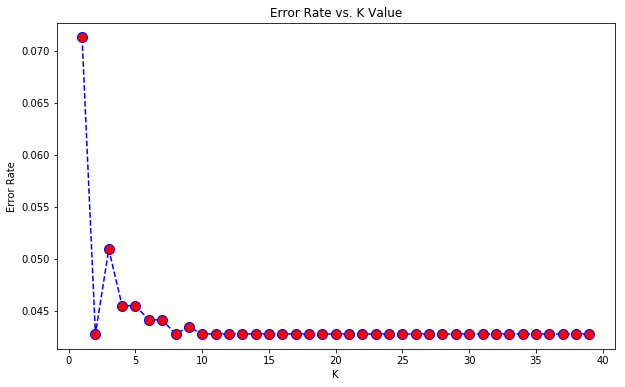

In [14]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != Y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [15]:
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,Y_train)
pred = knn.predict(X_test)
print('Accuracy: %f' % knn.score(X_test, Y_test))
print(classification_report(Y_test,pred))
print('Confusion matrix:')
print(confusion_matrix(Y_test,pred,labels=[1,0]))

Accuracy: 0.928717
             precision    recall  f1-score   support

          0       0.96      0.96      0.96      1410
          1       0.16      0.16      0.16        63

avg / total       0.93      0.93      0.93      1473

Confusion matrix:
[[  10   53]
 [  52 1358]]


## Naïve Bayes Classifier

In [16]:
model = GaussianNB()
trained_model = model.fit(X_train, Y_train)
print('Accuracy: %f' % trained_model.score(X_test, Y_test))
print(classification_report(Y_test,trained_model.predict(X_test)))
print('Confusion matrix:')
pred = trained_model.predict(X_test)
print(confusion_matrix(Y_test,pred,labels=[1,0]))



Accuracy: 0.867617
             precision    recall  f1-score   support

          0       0.97      0.89      0.93      1410
          1       0.13      0.38      0.20        63

avg / total       0.93      0.87      0.90      1473

Confusion matrix:
[[  24   39]
 [ 156 1254]]


## MLP

In [18]:
model = Sequential()
model.add(Dense(8, input_dim=12, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[metrics.categorical_accuracy])
# Fit the model
model.fit(X, Y, epochs=1000, batch_size=100, verbose=0)
#Evaluate the model.
scores = model.evaluate(X, Y, verbose=0)
print('Accuracy for Stroke: %f' %scores[0])

Accuracy for Stroke: 0.135625
